In [1]:
import pandas as pd
import numpy as np

In [2]:
# data = ps.read_csv('/home/k8user/Downloads/9408623-b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data = pd.read_csv("/home/k8user/Downloads/UCI_Credit_Card.csv")


In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [6]:
x = sc.fit_transform(data)

In [7]:
def sampling(args):
    mean, logsigma = args
    batch = tf.shape(mean)[0]
    dim = tf.shape(mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
#     epsilon = K.random_normal(shape=(K.shape(mean)[0], 512), mean=0., stddev=1.0)
    return mean + K.exp(logsigma / 2) * epsilon

In [8]:
original_shape = x.shape[1]
shape = (original_shape,)
# inter = 46
# inter1 = 32
# latent = 2

In [9]:
def gauss(x):
    return K.exp((-K.square(x)))

def morlet_wavelet(x):
    return (K.cos(1.75 * x)) * K.exp(-x**2/2)

In [10]:
from keras import backend as K 
from keras.layers import Layer
class WNN_1(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim 
        super(WNN_1, self).__init__(**kwargs)
    def build(self, input_shape):
        # self.input_shape = input_shape[1]
        self.kernel = self.add_weight(name = 'kernel',shape = (input_shape[1], self.output_dim),initializer = 'normal', trainable = True)
        # self.dilation = self.add_weight(name='dilation', shape = (input_shape[1],),initializer = 'normal', trainable = True)
        # self.dilation = self.dilation
        # self.translation = self.add_weight(name='translation', shape = (input_shape[1]),initializer = 'normal', trainable = True)
        # self.translation = translation
        drx = K.random_normal(shape=(1,18))
        self.dilation = drx
        self.dilation.requires_grad=True
        trx = K.random_normal(shape=(1,18))
        self.translation = trx
        self.translation.requires_grad=True
        super(WNN_1, self).build(input_shape)

    def call(self, input_data):
        v = K.dot(input_data, self.kernel)
        # print(v)
        v1 = (v  - self.dilation) / self.translation
        # v2 = gauss(v1)
        v2 = morlet_wavelet(v1)
        # print(v1)
        return v2

2022-11-26 11:44:45.015387: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from keras import backend as K 
from keras.layers import Layer
class WNN_2(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim 
        super(WNN_2, self).__init__(**kwargs)
    def build(self, input_shape):
        # self.input_shape = input_shape[1]
        self.kernel = self.add_weight(name = 'kernel',shape = (input_shape[1], self.output_dim),initializer = 'normal', trainable = True)
        # self.dilation = self.add_weight(name='dilation', shape = (input_shape[1],),initializer = 'normal', trainable = True)
        # self.dilation = self.dilation
        # self.translation = self.add_weight(name='translation', shape = (input_shape[1]),initializer = 'normal', trainable = True)
        # self.translation = translation
        drx = K.random_normal(shape=(1,18))
        self.dilation = drx
        self.dilation.requires_grad=True
        trx = K.random_normal(shape=(1,18))
        self.translation = trx
        self.translation.requires_grad=True
        super(WNN_2, self).build(input_shape)

    def call(self, input_data):
        v = K.dot(input_data, self.kernel)
        # print(v)
        v1 = (v  - self.dilation) / self.translation
        # v2 = gauss(v1)
        v2 = morlet_wavelet(v1)
        # print(v1)
        return v2

In [12]:
original_shape

25

In [13]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import *
import os
from keras import metrics, backend as K

In [14]:
def encoder():
    X = Input(shape=shape)
    model = WNN_1(18)(X)
    # model = Dense(8,activation='relu')(X)

    mean = Dense(2)(model)
    logsigma = Dense(2)(model)
    latent = Lambda(sampling, output_shape=(2,))([mean, logsigma])
    meansigma = Model([X], [mean, logsigma, latent])
    return meansigma
# Lambda(Sampling(), output_shape=(latent,),name='z-samples')([z_mu, z_log_var])

In [15]:
def decoder():
    X = Input(shape=(2,))
    model1 = WNN_2(18)(X)
    # model1 = Dense(8,activation='relu')(X)
   
    model = Dense(original_shape,activation='tanh')(model1)
    model = Model(X, model)
    return model

In [16]:
from tensorflow.keras.optimizers import Adam

ADAMop = Adam(lr=0.001)

/home/k8user/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
# encoder
E = encoder()
# E.compile(optimizer=ADAMop, loss='mse')
E.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 wnn_1 (WNN_1)                  (None, 18)           450         ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 2)            38          ['wnn_1[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 2)            38          ['wnn_1[0][0]']                  
                                                                                              

2022-11-26 11:44:52.985040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-26 11:44:52.986120: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [18]:
# generator/decoder
G = decoder()
# G.compile(optimizer=ADAMop, loss='mse')
G.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 wnn_2 (WNN_2)               (None, 18)                36        
                                                                 
 dense_2 (Dense)             (None, 25)                475       
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [19]:
# VAE
X = Input(shape=(shape))
# latent_rep = E(X)[0]
# output = G(latent_rep)
E_mean, E_logsigma, Z = E(X)

In [20]:
Z

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'model')>

In [21]:
output = G(Z)
print(output)

KerasTensor(type_spec=TensorSpec(shape=(None, 25), dtype=tf.float32, name=None), name='model_1/dense_2/Tanh:0', description="created by layer 'model_1'")


In [22]:
VAE = Model(X, output)
# VAE = Model(X, G(E(X)))

In [23]:
kl = - 0.5 * K.sum(1 + E_logsigma - K.square(E_mean) - K.exp(E_logsigma), axis=-1)
crossent = metrics.mse(X, output)
crossent *= original_shape
VAEloss = K.mean(crossent + kl)
VAE.add_loss(VAEloss)
VAE.compile(optimizer=ADAMop)
VAE.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 model (Functional)             [(None, 2),          526         ['input_3[0][0]']                
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 model_1 (Functional)           (None, 25)           511         ['model[0][2]']                  
                                                                                            

In [24]:
# !pip install pydot
import pydot
import graphviz

In [25]:
# tf.keras.utils.plot_model(VAE, show_shapes=True);

In [26]:
model1 = VAE.fit(x, x, batch_size=64, validation_split=0.1, epochs=150)

Epoch 1/150
422/422 [==============================] - 3s 6ms/step - loss: 22.5319 - val_loss: 28.5064
Epoch 2/150
422/422 [==============================] - 2s 5ms/step - loss: 19.6026 - val_loss: 27.4010
Epoch 3/150
422/422 [==============================] - 2s 5ms/step - loss: 19.0220 - val_loss: 27.0063
Epoch 4/150
422/422 [==============================] - 2s 6ms/step - loss: 18.6354 - val_loss: 26.4321
Epoch 5/150
422/422 [==============================] - 2s 5ms/step - loss: 18.4253 - val_loss: 26.4251
Epoch 6/150
422/422 [==============================] - 2s 5ms/step - loss: 18.3505 - val_loss: 26.3342
Epoch 7/150
422/422 [==============================] - 2s 6ms/step - loss: 18.2808 - val_loss: 26.3033
Epoch 8/150
422/422 [==============================] - 2s 5ms/step - loss: 18.2293 - val_loss: 26.1245
Epoch 9/150
422/422 [==============================] - 2s 5ms/step - loss: 18.1848 - val_loss: 26.1231
Epoch 10/150
422/422 [==============================] - 2s 4ms/step - los

Epoch 80/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8674 - val_loss: 25.9460
Epoch 81/150
422/422 [==============================] - 1s 3ms/step - loss: 17.8741 - val_loss: 25.7668
Epoch 82/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8621 - val_loss: 25.8366
Epoch 83/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8580 - val_loss: 25.8669
Epoch 84/150
422/422 [==============================] - 1s 3ms/step - loss: 17.8510 - val_loss: 25.9575
Epoch 85/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8669 - val_loss: 25.9876
Epoch 86/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8626 - val_loss: 25.7368
Epoch 87/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8772 - val_loss: 25.7043
Epoch 88/150
422/422 [==============================] - 2s 4ms/step - loss: 17.8746 - val_loss: 25.9427
Epoch 89/150
422/422 [==============================] - 1s 3ms/s

In [27]:
nodes = [5,8,10]
lat_dim = [2,5]
epoch = [50,100,150]
lr = [0.001,0.005,0.009,0.01]
moment = [0.001,0.005,0.009,0.008,0.01]
batch_size = [32,64]

In [28]:
max_value = None
best_mse = None
from sklearn.metrics import mean_squared_error

In [29]:
# import time
# mses_adam = []
# for i in range(len(epoch)):
#     for j in range(len(lr)):
#         for b in range(len(batch_size)):
#             start = time.time()
#             # vae.add_loss(vae_loss)
#             VAE.compile(optimizer=Adam(learning_rate=lr[j]))
#             VAE.fit(x, x, epochs=epoch[i],batch_size=batch_size[b], validation_split=0.1)
#             X_predict = VAE.predict(x)
#             print(mean_squared_error(x, X_predict))
#             mses_adam.append(mean_squared_error(x, X_predict))
# #             for error in mses_adam:
# #                 if (max_value is None or error > max_value):
# #                     max_value = error
                    
# #                     best_mse = VAE
#             elapsed_time_fl = (time.time() - start)
#             print("elapsed time for each combination: ",elapsed_time_fl)
#             print("\n")
#             print("==================================================================")
            
# print(best_mse)

In [30]:
# for i in range(len(epoch)):
#     for j in range(len(lr)):
#         for b in range(len(batch_size)):
#             print(epoch[i],lr[j],batch_size[b])

In [31]:
# len(mses_adam)
# mses_adam

In [32]:
# (pd.DataFrame(mses_adam)).min()

In [33]:
pred=VAE.predict(x)

938/938 [==============================] - 2s 2ms/step


In [34]:
len(VAE.get_weights())

8

## New Model

## Encoder

In [35]:
def encoder1():
    X = Input(shape=shape)
    model = WNN_1(18)(X)
    # model = Dense(8,activation='relu')(X)

    mean = Dense(2)(model)
    logsigma = Dense(2)(model)
    latent = Lambda(sampling, output_shape=(2,))([mean, logsigma])
    meansigma = Model([X], [mean, logsigma, latent])
    return meansigma
# Lambda(Sampling(), output_shape=(latent,),name='z-samples')([z_mu, z_log_var])

In [36]:
def decoder1():
    X = Input(shape=(2,))
    model1 = WNN_2(18)(X)
    # model1 = Dense(8,activation='relu')(X)
   
#     model = Dense(original_shape,activation='tanh')(model1)
    model = Model(X, model1)
    return model

In [37]:
from tensorflow.keras.optimizers import Adam

ADAMop1 = Adam(learning_rate=0.001)

In [38]:
# encoder
E1 = encoder1()
# E.compile(optimizer=ADAMop, loss='mse')
E1.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 wnn_1_1 (WNN_1)                (None, 18)           450         ['input_4[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 2)            38          ['wnn_1_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 2)            38          ['wnn_1_1[0][0]']                
                                                                                            

In [39]:
# generator/decoder
G1 = decoder1()
# G.compile(optimizer=ADAMop, loss='mse')
G1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 wnn_2_1 (WNN_2)             (None, 18)                36        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [40]:
# VAE
X1 = Input(shape=(shape))
# latent_rep = E(X)[0]
# output = G(latent_rep)
E_mean1, E_logsigma1, Z1 = E1(X1)

In [41]:
Z1

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'model_3')>

In [42]:
output1 = G1(Z1)
print(output1)

KerasTensor(type_spec=TensorSpec(shape=(None, 18), dtype=tf.float32, name=None), name='model_4/wnn_2_1/mul_1:0', description="created by layer 'model_4'")


In [43]:
VAE1 = Model(X1, output1)
# VAE = Model(X, G(E(X)))

In [44]:
VAE1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 25)]              0         
                                                                 
 model_3 (Functional)        [(None, 2),               526       
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 model_4 (Functional)        (None, 18)                36        
                                                                 
Total params: 562
Trainable params: 562
Non-trainable params: 0
_________________________________________________________________


In [45]:
original_shape

25

In [46]:
kl1 = - 0.5 * K.sum(1 + E_logsigma1 - K.square(E_mean1) - K.exp(E_logsigma1), axis=-1)
# crossent1 = metrics.mse(X1, output1)
# crossent1 *= original_shape
VAEloss1 = K.mean(kl1)
VAE1.add_loss(VAEloss1)
VAE1.compile(optimizer=ADAMop1)
VAE1.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 model_3 (Functional)           [(None, 2),          526         ['input_6[0][0]']                
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 model_4 (Functional)           (None, 18)           36          ['model_3[0][2]']                
                                                                                            

In [47]:
new_weights=VAE.get_weights()[:6]

In [48]:
len(new_weights)

6

In [49]:
VAE1.set_weights(new_weights)

In [50]:
X_pred_new = VAE1.predict(x)

938/938 [==============================] - 1s 722us/step


In [51]:
X_pred_new

array([[-4.43394221e-02,  5.89395642e-01,  9.77791011e-01, ...,
        -2.25243509e-01, -2.74178058e-01,  7.91481853e-01],
       [ 7.71471648e-04,  1.08353049e-01,  9.35326278e-01, ...,
        -1.03530459e-01,  4.37290192e-01, -2.67468393e-01],
       [ 1.19629945e-03,  2.42874905e-01, -2.62411267e-01, ...,
        -8.05193931e-02, -1.45253921e-07,  1.08798206e-01],
       ...,
       [ 8.38897191e-04,  1.11798622e-01,  9.02621686e-01, ...,
        -7.84328058e-02,  5.97393155e-01, -2.67480999e-01],
       [ 4.68489202e-03,  3.21614325e-01,  7.78891206e-01, ...,
        -2.88285792e-01, -3.77301089e-02, -1.43041380e-03],
       [ 1.66077586e-03,  2.08558455e-01,  5.09103000e-01, ...,
        -2.85572797e-01, -2.19608191e-04, -2.16228947e-01]], dtype=float32)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
# mean_squared_error(x,X_pred_new)

In [54]:
# predd=sc.inverse_transform(X_pred_new)

In [55]:
# train = pd.DataFrame(predd)
train = pd.DataFrame(X_pred_new)

In [56]:
# train.columns = data.columns

In [57]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.044339,0.589396,0.977791,-0.000000e+00,0.901029,-0.287190,-9.079326e-03,0.118525,-0.285503,0.000986,0.363807,0.608941,3.623079e-23,0.575587,0.053035,-0.225244,-2.741781e-01,0.791482
1,0.000771,0.108353,0.935326,0.000000e+00,0.427541,0.005658,8.742820e-01,-0.277853,-0.000876,0.002000,-0.123530,0.538897,-1.840970e-34,-0.206772,-0.084612,-0.103530,4.372902e-01,-0.267468
2,0.001196,0.242875,-0.262411,0.000000e+00,0.782564,-0.226756,2.083051e-09,-0.106709,-0.072151,-0.000005,-0.178200,0.408511,-1.222701e-31,-0.038074,-0.142738,-0.080519,-1.452539e-07,0.108798
3,0.000743,0.207099,-0.257808,-0.000000e+00,0.751018,-0.190451,-3.090129e-07,-0.138388,-0.048976,-0.000005,-0.176311,0.401005,-2.951516e-32,-0.087771,-0.208492,-0.079882,-1.546261e-07,-0.002364
4,-0.206428,0.716767,0.252460,1.316270e-25,0.940584,-0.281774,7.692809e-01,0.236169,-0.116122,0.002947,-0.259476,0.677881,-8.698037e-20,0.806137,0.491578,0.109946,9.643487e-01,0.968635


In [58]:
from sklearn.model_selection import train_test_split

In [89]:
y = data['default.payment.next.month']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(train,data['default.payment.next.month'],test_size=0.2,stratify=data['default.payment.next.month'])

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [61]:
y_train.value_counts()

0    18691
1     5309
Name: default.payment.next.month, dtype: int64

In [62]:
dc_model = dt.fit(x_train,y_train)

In [63]:
dc_pred = dc_model.predict(x_test)

In [64]:
dc_pred

array([0, 1, 0, ..., 0, 0, 1])

In [65]:
y_test.value_counts()

0    4673
1    1327
Name: default.payment.next.month, dtype: int64

In [66]:
(pd.DataFrame(dc_pred)).value_counts()

0    4648
1    1352
dtype: int64

In [67]:
dc_pred.max()

1

In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [69]:
accuracy_score(y_test, dc_pred)

0.7511666666666666

In [70]:
roc_auc_score(y_test, dc_pred)

0.642225109178721

In [71]:
cm = confusion_matrix(y_test, dc_pred)
cm

array([[3914,  759],
       [ 734,  593]])

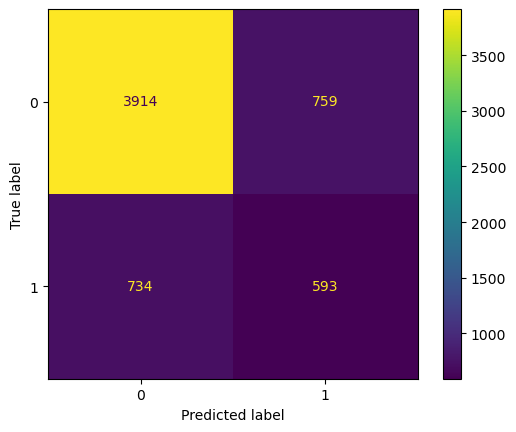

In [72]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = dc_model.classes_).plot();

In [58]:
data.std()

ID                              8660.398374
LIMIT_BAL                     129747.661567
SEX                                0.489129
EDUCATION                          0.790349
MARRIAGE                           0.521970
AGE                                9.217904
PAY_0                              1.123802
PAY_2                              1.197186
PAY_3                              1.196868
PAY_4                              1.169139
PAY_5                              1.133187
PAY_6                              1.149988
BILL_AMT1                      73635.860576
BILL_AMT2                      71173.768783
BILL_AMT3                      69349.387427
BILL_AMT4                      64332.856134
BILL_AMT5                      60797.155770
BILL_AMT6                      59554.107537
PAY_AMT1                       16563.280354
PAY_AMT2                       23040.870402
PAY_AMT3                       17606.961470
PAY_AMT4                       15666.159744
PAY_AMT5                       1

In [59]:
train.std()

ID                              451.232178
LIMIT_BAL                     76717.921875
SEX                               0.049176
EDUCATION                         0.257587
MARRIAGE                          0.324539
AGE                               4.706163
PAY_0                             0.640044
PAY_2                             0.749088
PAY_3                             0.756167
PAY_4                             0.743174
PAY_5                             0.714878
PAY_6                             0.718945
BILL_AMT1                     40494.667969
BILL_AMT2                     39839.898438
BILL_AMT3                     38826.324219
BILL_AMT4                     35787.011719
BILL_AMT5                     33543.425781
BILL_AMT6                     32739.103516
PAY_AMT1                       4595.492676
PAY_AMT2                       5558.967285
PAY_AMT3                       4527.684570
PAY_AMT4                       4288.078613
PAY_AMT5                       4194.367676
PAY_AMT6   

In [73]:
from sklearn.model_selection import StratifiedKFold

In [74]:
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [86]:
def get_models():
    models = list()
    models.append(LogisticRegression(max_iter=100000))
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(RandomForestClassifier())
    models.append(AdaBoostClassifier())
    models.append(MLPClassifier())
#     models.append(BernoulliNB())
#     models.append(SVC())
    models.append(LGBMClassifier())
    models.append(CatBoostClassifier())
    models.append(XGBClassifier())
    return models

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
lr_param_grid = [    
                {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [100, 1000,2500, 5000]
                }
             ]
svc_parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly','rbf', 'sigmoid','linear']}


knn_parameters = { 'n_neighbors' : [5,7,9,11,13,15], 'weights' : ['uniform','distance'],'metric' : ['minkowski','euclidean','manhattan']}

Decis_parameters = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"]}


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

rand_parameters = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}



# ada_parameters = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

ada_parameters = {
                    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
                    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
                    'algorithm': ['SAMME', 'SAMME.R']
                }



mlp_parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'activation': ['tanh', 'relu'],'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']}


xgb_parameters ={
                'n_estimators': [100, 200, 500],
                'learning_rate': [0.01,0.05,0.1],
                'booster': ['gbtree', 'gblinear'],
                'gamma': [0, 0.5, 1],
                'reg_alpha': [0, 0.5, 1],
                'reg_lambda': [0.5, 1, 5],
                'base_score': [0.2, 0.5, 1]
                }



cat_parameters = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}



# fit_params={"early_stopping_rounds":30, 
#             "eval_metric" : 'auc', 
#             "eval_set" : [(X_test,y_test)],
#             'eval_names': ['valid'],
#             #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
#             'verbose': 100,
#             'categorical_feature': 'auto'}


from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgb_parameters = {'num_leaves': sp_randint(6, 50), 
                 'min_child_samples': sp_randint(100, 500), 
                 'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                 'subsample': sp_uniform(loc=0.2, scale=0.8), 
                 'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                 'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                 'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}



In [87]:
models = get_models()
len(models)

9

In [80]:
from sklearn.model_selection import *
from timeit import default_timer as timer
from sklearn import metrics
import statistics
skf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

In [81]:
from sklearn.metrics import RocCurveDisplay, plot_roc_curve, confusion_matrix, accuracy_score, f1_score, roc_auc_score

In [96]:
# for model in models:
count = 0
AUC_logistic = []
for train_index, test_index in skf.split(train, y):
    print("LogisticRegression")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = LogisticRegression()
    clf = GridSearchCV(package,param_grid=lr_param_grid)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_logistic.append(roc_score)
    print("ROC-SCORE-LogisticRegression: ", roc_score)
    # print('\n')
print("================================================================")
print('\n')

LogisticRegression
FOLD:  1
ROC-SCORE-LogisticRegression:  0.6719291549760688
LogisticRegression
FOLD:  2
ROC-SCORE-LogisticRegression:  0.6824713236507676
LogisticRegression
FOLD:  3
ROC-SCORE-LogisticRegression:  0.6528666033999009
LogisticRegression
FOLD:  4
ROC-SCORE-LogisticRegression:  0.6849289280409308
LogisticRegression
FOLD:  5
ROC-SCORE-LogisticRegression:  0.668481288166364
LogisticRegression
FOLD:  6
ROC-SCORE-LogisticRegression:  0.6796733165538867
LogisticRegression
FOLD:  7
ROC-SCORE-LogisticRegression:  0.6725652836428341
LogisticRegression
FOLD:  8
ROC-SCORE-LogisticRegression:  0.673950630909024
LogisticRegression
FOLD:  9
ROC-SCORE-LogisticRegression:  0.6794542641782693
LogisticRegression
FOLD:  10
ROC-SCORE-LogisticRegression:  0.6461168648361882




In [97]:
# for model in models:
count = 0
AUC_KNN = []
for train_index, test_index in skf.split(train, y):
    print("KNeighborsClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = KNeighborsClassifier()
    clf = GridSearchCV(package,param_grid=knn_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_KNN.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-KNeighborsClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

KNeighborsClassifier
FOLD:  1
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.6701214102987292
KNeighborsClassifier
FOLD:  2
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.680116871595973
KNeighborsClassifier
FOLD:  3
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.6473015349067502
KNeighborsClassifier
FOLD:  4
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.6873220622214887
KNeighborsClassifier
FOLD:  5
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.6558064449579137
KNeighborsClassifier
FOLD:  6
<========================AUC====================================>
ROC-SCORE-KNeighborsClassifier:  0.6712070886284865
KNeighborsClassifier
FOLD:  7
<========================AUC====================================>
ROC-SCORE-KNeighb

In [98]:
# for model in models:
count = 0
AUC_Decision = []
for train_index, test_index in skf.split(train, y):
    print("DecisionTreeClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = DecisionTreeClassifier()
    clf = GridSearchCV(package,param_grid=Decis_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_Decision.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-DecisionTreeClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')


DecisionTreeClassifier
FOLD:  1
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.6660881539858062
DecisionTreeClassifier
FOLD:  2
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.6726589577488035
DecisionTreeClassifier
FOLD:  3
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.6372364457831325
DecisionTreeClassifier
FOLD:  4
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.6756555330912691
DecisionTreeClassifier
FOLD:  5
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.6577096055454695
DecisionTreeClassifier
FOLD:  6
<========================AUC====================================>
ROC-SCORE-DecisionTreeClassifier:  0.665446030698135
DecisionTreeClassifier
FOLD:  7
<========================AUC=============================

In [ ]:
# for model in models:
count = 0
AUC_RF = []
for train_index, test_index in skf.split(train, y):
    print("RandomForestClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = RandomForestClassifier()
    clf = GridSearchCV(package,param_grid=rand_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_RF.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-RandomForestClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

RandomForestClassifier
FOLD:  1
<========================AUC====================================>
ROC-SCORE-RandomForestClassifier:  0.6725558054134345
RandomForestClassifier
FOLD:  2
<========================AUC====================================>
ROC-SCORE-RandomForestClassifier:  0.6752506601749464
RandomForestClassifier
FOLD:  3


In [ ]:
# for model in models:
count = 0
AUC_ABC = []
for train_index, test_index in skf.split(train, y):
    print("AdaBoostClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = AdaBoostClassifier()
    clf = GridSearchCV(package,param_grid=ada_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_ABC.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-AdaBoostClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

In [ ]:
# for model in models:
count = 0
AUC_MLP = []
for train_index, test_index in skf.split(train, y):
    print("MLPClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = MLPClassifier()
    clf = GridSearchCV(package,param_grid=mlp_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_MLP.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-MLPClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

In [ ]:
# for model in models:
count = 0
AUC_LGB = []
for train_index, test_index in skf.split(train, y):
    print("LGBMClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = LGBMClassifier()
    clf = GridSearchCV(package,param_grid=lgb_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_LGB.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-LGBMClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

In [ ]:
# for model in models:
count = 0
AUC_CAT = []
for train_index, test_index in skf.split(train, y):
    print("CatBoostClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = CatBoostClassifier()
    clf = GridSearchCV(package,param_grid=cat_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_CAT.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-CatBoostClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

In [ ]:
# for model in models:
count = 0
AUC_XGB = []
for train_index, test_index in skf.split(train, y):
    print("XGBClassifier")
    count+=1
    print("FOLD: ",count)
    # print("Model : ", model)
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = train.loc[train_index], train.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    package = XGBClassifier()
    clf = GridSearchCV(package,param_grid=xgb_parameters)
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    AUC_XGB.append(roc_score)
    print("<========================AUC====================================>")
    print("ROC-SCORE-XGBClassifier: ", roc_score)
    # print('\n')
print("<================================================================>")
print('\n')

# Python

In [5]:
a,b= [int(x) for x in input("Enter 2 numbers :").split(',')]
print("Product is :", a*b)

Product is : 6


In [8]:
a,b,c = [float(x) for x in input("Enter 3 numbers :").split(',')]
print("Answer is :", a+b*c)

Answer is : 16.72


In [9]:
print("Hello",end=' ')
print("Durga",end=' ')
print("Soft")

Hello Durga Soft


In [10]:
s="Durga"
a=48
s1="java"
s2="Python"
print("Hello",s,"Your Age is",a)
print("You are teaching",s1,"and",s2)

Hello Durga Your Age is 48
You are teaching java and Python


In [12]:
a = 10
b = 20
c = 30

print("a value is %i"%a)
print("b value is %d and c value is %d"%(b,c))

a value is 10
b value is 20 and c value is 30


In [13]:
for x in range(10) :
    print("Hello")

Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello
Hello


In [14]:
for x in range(11) :
    print(x)

0
1
2
3
4
5
6
7
8
9
10


In [16]:
for x in range(21) :
    if (x%2!=0):
        print(x)

1
3
5
7
9
11
13
15
17
19


In [17]:
for x in range(10,0,-1) :
    print(x)

10
9
8
7
6
5
4
3
2
1


In [21]:
list=eval(input("Enter List:"))
sum=0;
for x in list:
    sum=sum+x;
    print(sum)
print("The Sum=",sum)

1
3
6
10
The Sum= 10


In [23]:
x = 1

while x<=10:
    print(x)
    x = x + 1    

1
2
3
4
5
6
7
8
9
10


In [25]:
n = int(input("Enter number:"))
sum= 0
i = 1

while i <=n:
    sum = sum+i
    i = i+1
print("The sum of first",n,"number is:",sum)

The sum of first 10 number is: 55


In [28]:
name=""
while name!="durga":
    name=input("Enter Name:")
print("Thanks for confirmation")

Thanks for confirmation


In [36]:
n = int(input("Enter number of rows:"))
for i in range(1,n+1):
    # print(i)
    for j in range(1,i+1):
        # print(j)
        print("*",end=" ")
    print()    

* 
* * 
* * * 
* * * * 


In [40]:
n = int(input("Enter number of rows:"))
for i in range(1, n+1):
    print("*" * i)

*
**
***
****


In [53]:
n = int(input("Enter number of rows:"))
for i in range(1, n+1):
    print(" " * (n-i),end=" ")
    print("* "*i)

        * 
       * * 
      * * * 
     * * * * 
    * * * * * 
   * * * * * * 
  * * * * * * * 
 * * * * * * * * 


In [52]:
n = int(input("Enter number of rows:"))
for i in range(1,n+1):
 print(" " * (n-i),end="")
 print("* "*i)

       * 
      * * 
     * * * 
    * * * * 
   * * * * * 
  * * * * * * 
 * * * * * * * 
* * * * * * * * 


In [54]:
s = input("Enter some string:")
i = 0
for x in s:
    print("The character present at positive index {} and at negative index {} is {}".format(i, i-len(s), x))
    i = i+1
    

The character present at positive index 0 and at negative index -6 is p
The character present at positive index 1 and at negative index -5 is r
The character present at positive index 2 and at negative index -4 is a
The character present at positive index 3 and at negative index -3 is n
The character present at positive index 4 and at negative index -2 is a
The character present at positive index 5 and at negative index -1 is y
